In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

df_games = pd.read_csv('board_games.csv')

Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   


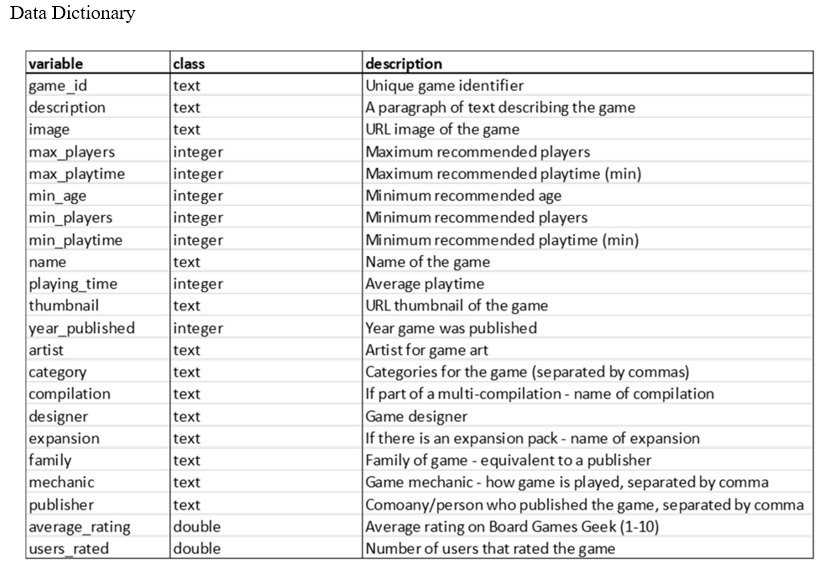

In [3]:
# Data Dictionary
from IPython.display import Image
Image(filename =r'Data_Dictionary.jpg')

In [4]:
df_games.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [5]:
df_games.shape

(10532, 22)

In [6]:
df_games.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [7]:
df_games.describe(include=object)

,description,image,name,thumbnail,artist,category,compilation,designer,expansion,family,mechanic,publisher
count,10532,10531,10532,10531,7759,10438,410,10406,2752,7724,9582,10529
unique,10528,10527,10357,10527,4641,3860,336,4678,2634,3918,3209,5512
top,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic2410035.png,Robin Hood,//cf.geekdo-images.com/images/pic2410035_t.png,Franz Vohwinkel,"Wargame,World War II","Traveller: The Classic Games, Games 1-6+",(Uncredited),"Règlement de l'An XXX,Regulations of the Year ...",Crowdfunding: Kickstarter,Hex-and-Counter,GMT Games
freq,3,2,5,2,166,449,8,558,7,391,523,180


In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [9]:
num_nulls = df_games.isna().sum()
print(num_nulls)

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64


## Part 1: (Column Names are denoted by quotation marks)
  
•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories? (You may not use a barchart)
•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  
•	What are the 5 most common “mechanics” in the dataset?  


### What are the top 5 “average rated” games?

Data Table with the top 5 games with “average rating” are:
                                              name  average_rating
0                     Small World Designer Edition         9.00392
1                           Kingdom Death: Monster         8.93184
2                           Terra Mystica: Big Box         8.84862
3                         Last Chance for Victory          8.84603
4  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081


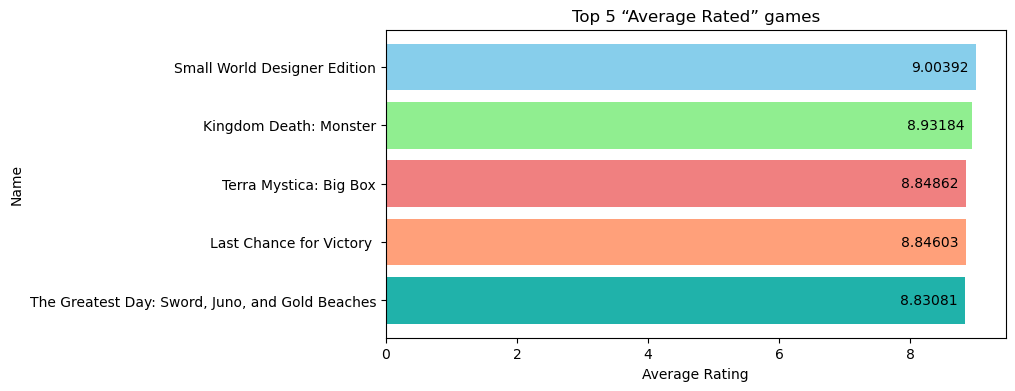

In [10]:
# Top 5 “average rated” games
df_games_top_5 = df_games[['name', 'average_rating']]

df_games_top_5 = df_games_top_5.sort_values(by='average_rating', ascending=False)

top_5 = df_games_top_5.head(5)

# Data Table
data = {'name': ['Small World Designer Edition', 'Kingdom Death: Monster', 'Terra Mystica: Big Box', 
                 'Last Chance for Victory ', 'The Greatest Day: Sword, Juno, and Gold Beaches'],
        'average_rating': [9.00392, 8.93184, 8.84862, 8.84603, 8.83081]}

top_5 = pd.DataFrame(data)

print("Data Table with the top 5 games with “average rating” are:")
print(top_5)

# Visualization
plt.figure(figsize=(8, 4))  
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'] 

bars = plt.barh(top_5['name'], top_5['average_rating'], color=colors)  

for bar, rating in zip(bars, top_5['average_rating']):
    plt.text(bar.get_width() - 0.99, bar.get_y() + bar.get_height() / 2, f'{rating}', va='center')

plt.xlabel('Average Rating')
plt.ylabel('Name')
plt.title('Top 5 “Average Rated” games')
plt.gca().invert_yaxis()
plt.show()

### Is there a correlation between the “users_rated” and the “max_playtime”?

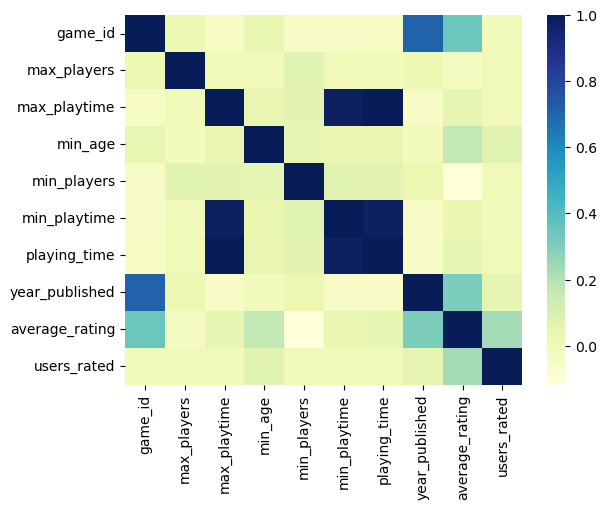

In [11]:
# Correlation Matrix
corr_matrix = df_games.corr()

sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [12]:
# Correlation between the "users_rated" and the "max_playtime"
correlation = df_games['users_rated'].corr(df_games['max_playtime'])

print(f"Correlation between the “users_rated” and the “max_playtime”: {correlation}")

Correlation between the “users_rated” and the “max_playtime”: -0.00434164733377671


### What is the distribution of game categories? (You may not use a barchart)

In [13]:
# Verificar la cantidad de valores nulos en la columna "category"
null_count = df_games["category"].isnull().sum()

null_count

94

In [14]:
# 1. Limpieza de datos: Reemplazar valores nulos por "Unknown"
df_games["category"].fillna("Unknown", inplace=True)

In [15]:
# 2. Tokenización: Separar las categorías
categories_tokenized = df_games["category"].str.split(',')

categories_tokenized.head()

0    [Economic, Negotiation, Political]
1                  [Card Game, Fantasy]
2         [Abstract Strategy, Medieval]
3                             [Ancient]
4                            [Economic]
Name: category, dtype: object

In [16]:
# Realizar la codificación one-hot para la columna "category"
category_onehot = df_games["category"].str.get_dummies(sep=',')

category_onehot.head()

,Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,American West,Ancient,Animals,...,Travel,Trivia,Unknown,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Sumar las columnas para obtener la cantidad total de juegos en cada categoría
category_distribution = category_onehot.sum().sort_values(ascending=False)

category_distribution

Card Game                  2981
Wargame                    2034
Fantasy                    1218
Fighting                    900
Economic                    878
                           ... 
Pike and Shot                27
Game System                  22
American Indian Wars         15
Korean War                   14
Expansion for Base-game      11
Length: 84, dtype: int64

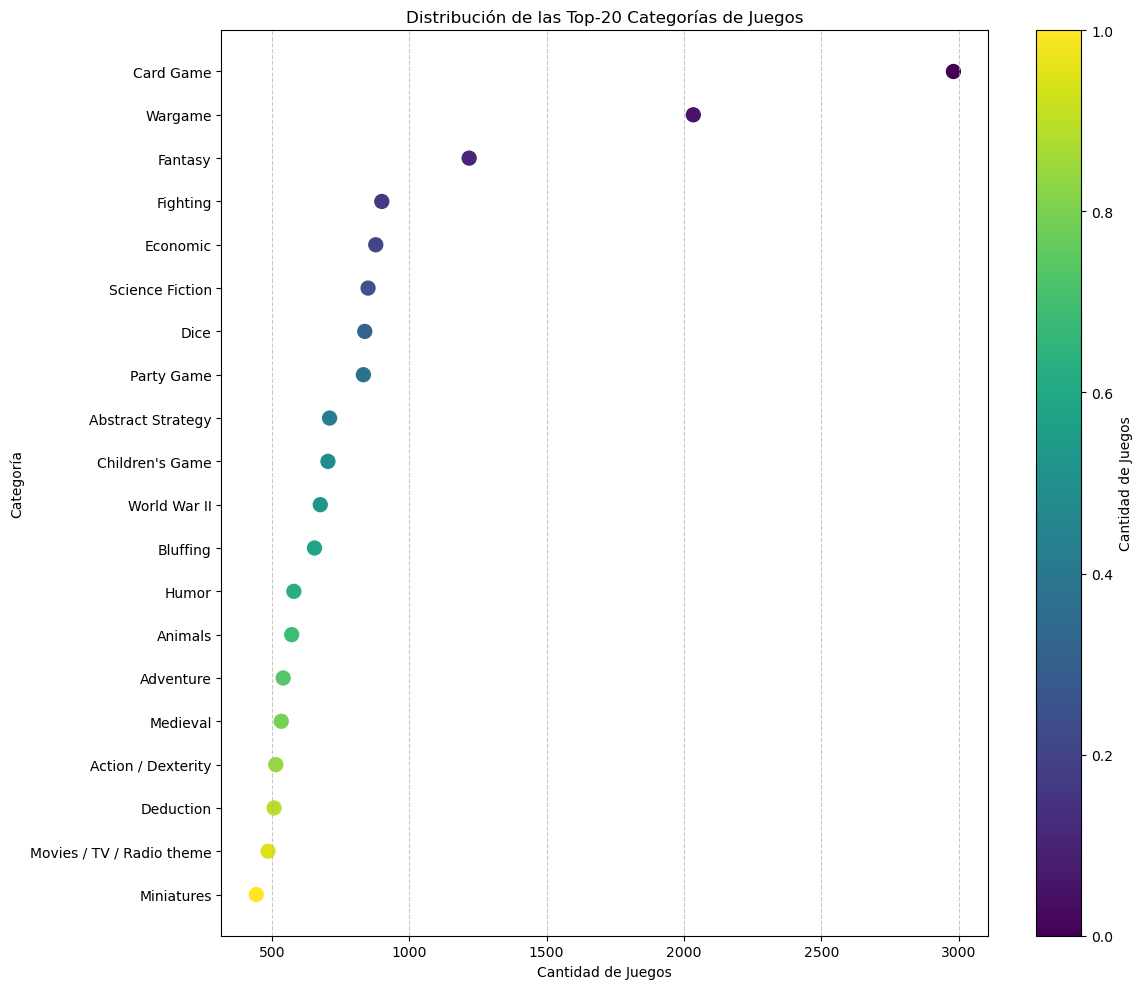

In [24]:
# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices = counts.argsort()
sorted_counts = counts[sorted_indices]
sorted_categories = categories[sorted_indices]
sorted_colors = colors[sorted_indices]

# Crear el Dot Plot con colores
plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts, sorted_categories, color=sorted_colors, s=100)
plt.title('Distribución de las Top-20 Categorías de Juegos')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Categoría')
plt.colorbar(label='Cantidad de Juegos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

In [25]:
# Dividir el dataframe en juegos antiguos (1992 y anteriores) y juegos nuevos (después de 1992)
older_games = df_games[df_games['year_published'] <= 1992]
newer_games = df_games[df_games['year_published'] > 1992]

# Calcular la "average rating" media para ambos grupos
older_games_avg_rating = older_games['average_rating'].mean()
newer_games_avg_rating = newer_games['average_rating'].mean()

older_games_avg_rating, newer_games_avg_rating

(6.035236628748707, 6.4463488532216795)

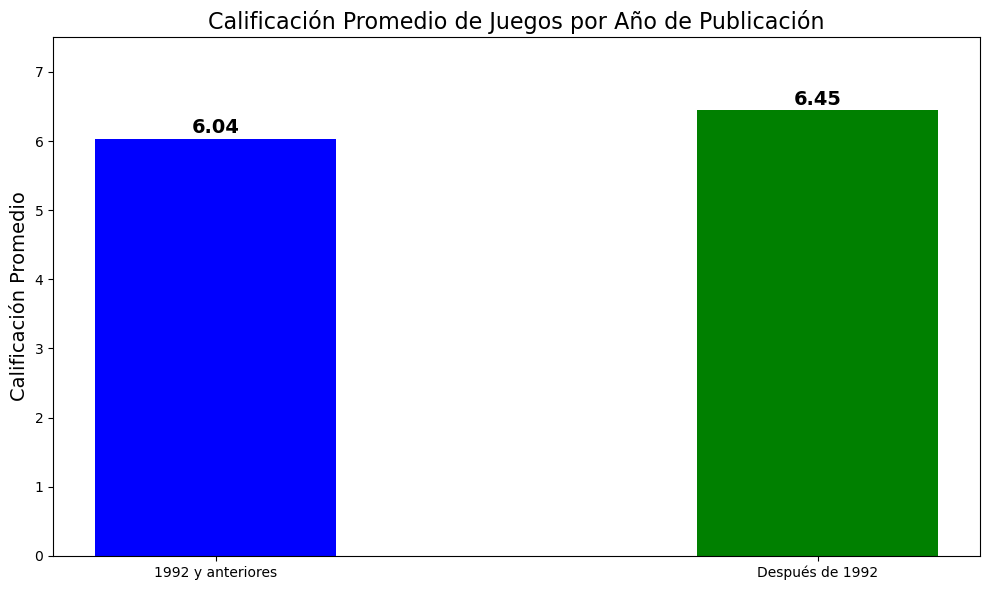

In [28]:
# Ajustar el ancho de las barras y el tamaño de la fuente de las etiquetas
bar_width = 0.4
font_size = 14

# Crear el gráfico de barras con las modificaciones
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, width=bar_width, color=['blue', 'green'])

# Añadir etiquetas con los valores exactos
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom', color='black', weight='bold', fontsize=font_size)

# Añadir título y etiquetas a los ejes
plt.title('Calificación Promedio de Juegos por Año de Publicación', fontsize=16)
plt.ylabel('Calificación Promedio', fontsize=14)
plt.ylim([0, 7.5])

plt.tight_layout()
plt.show()

### What are the 5 most common “mechanics” in the dataset?

In [34]:
# Procesar la columna "mechanic" para obtener los mecanismos más comunes
mechanics_list = df_games['mechanic'].dropna().str.split(',').tolist()
flat_mechanics_list = [item.strip() for sublist in mechanics_list for item in sublist]

# Convertir la lista a una Serie de pandas para contar las ocurrencias
mechanics_series = pd.Series(flat_mechanics_list)

# Obtener los 5 mecanismos más comunes
top_5_mechanics = mechanics_series.value_counts().head(5)
top_5_mechanics

Dice Rolling              2438
Hand Management           2176
Set Collection            1347
Hex-and-Counter           1244
Variable Player Powers    1223
dtype: int64

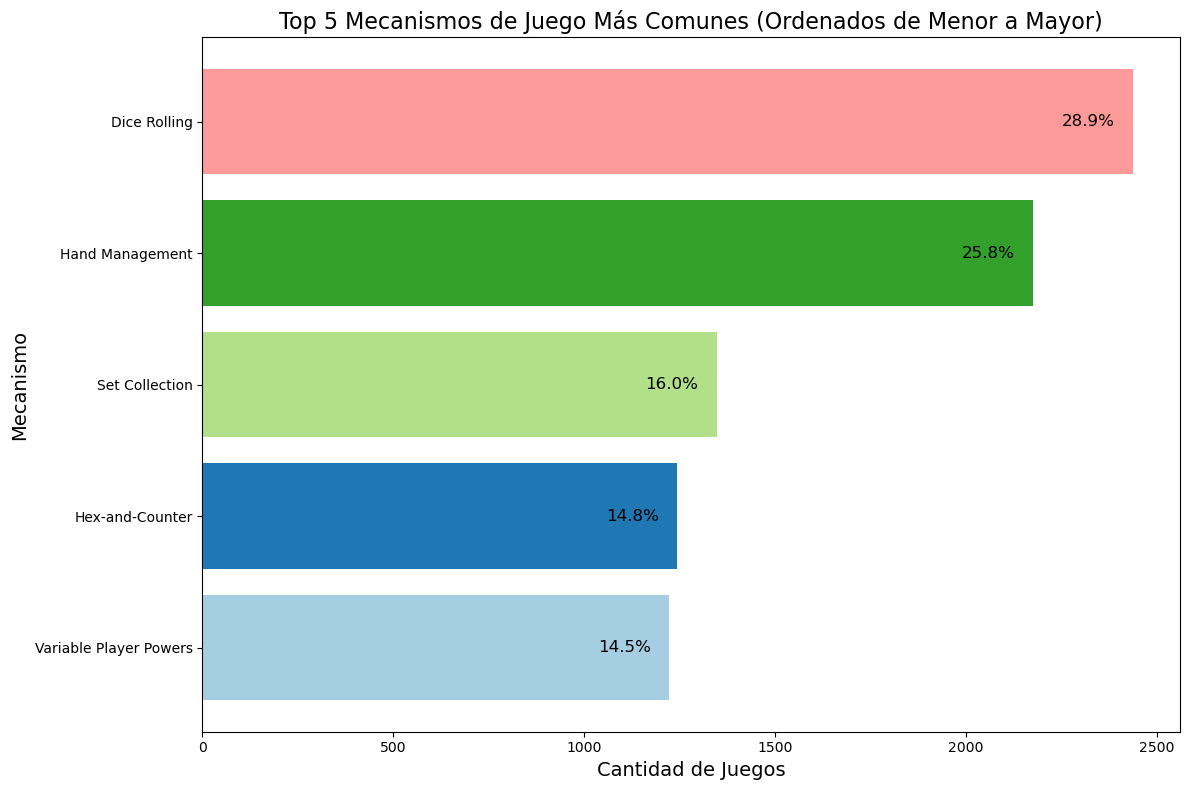

In [38]:
# Recalcular los porcentajes para cada mecanismo ordenados
sorted_percentages = (sorted_top_5_mechanics / sorted_top_5_mechanics.sum()) * 100

# Crear un gráfico de barras horizontal con los porcentajes ordenados
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_top_5_mechanics.index, sorted_top_5_mechanics.values, color=plt.cm.Paired.colors)

# Colocar los porcentajes en las barras
for bar, percentage in zip(bars, sorted_percentages):
    plt.text(bar.get_width() - (0.02 * sorted_top_5_mechanics.values[-1]), bar.get_y() + bar.get_height()/2, 
             f'{percentage:.1f}%', 
             va='center', ha='right', color='black', fontsize=12)

plt.title('Top 5 Mecanismos de Juego Más Comunes (Ordenados de Menor a Mayor)', fontsize=16)
plt.xlabel('Cantidad de Juegos', fontsize=14)
plt.ylabel('Mecanismo', fontsize=14)
plt.tight_layout()
plt.show()

## Part 2

### You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

## Part3:
  
You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  
